In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

final_ma_data = pd.read_csv('/Users/avanthpakanati/Desktop/ECON:HLTH Research Seminar /Homework4/data/Output/final_ma_data.csv')

/var/folders/2q/wzjp_2kd355b8clhzqwmytb40000gn/T/ipykernel_62843/3658248571.py:5: DtypeWarning: Columns (68,98,99,100,101,102,103,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  final_ma_data = pd.read_csv('/Users/avanthpakanati/Desktop/ECON:HLTH Research Seminar /Homework4/data/Output/final_ma_data.csv')


<Figure size 1200x600 with 0 Axes>

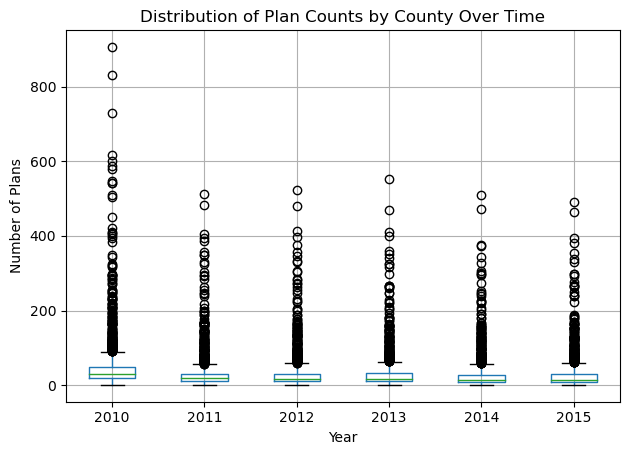

In [45]:
#QUESTION 1 
final_ma_data.columns = final_ma_data.columns.str.lower()
# Remove SNPs and removing 800-series plans
final_ma_data = final_ma_data[final_ma_data['snp'] != 'Yes']


final_ma_data = final_ma_data[~final_ma_data['planid'].astype(str).str.startswith('800')]

# Remove prescription drug-only plans (PDPs)
final_ma_data = final_ma_data[~final_ma_data['plan_type'].str.contains('PDP', na=False)]

# Group by year and county to count number of plans
plan_counts = (
    final_ma_data.groupby(['year', 'county'])
    .size()
    .reset_index(name='plan_count')
)

# Plot a box and whisker plot of plan counts by year
plt.figure(figsize=(12, 6))
plan_counts.boxplot(column='plan_count', by='year')
plt.title('Distribution of Plan Counts by County Over Time')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Number of Plans')
plt.grid(True)
plt.tight_layout()
plt.show()

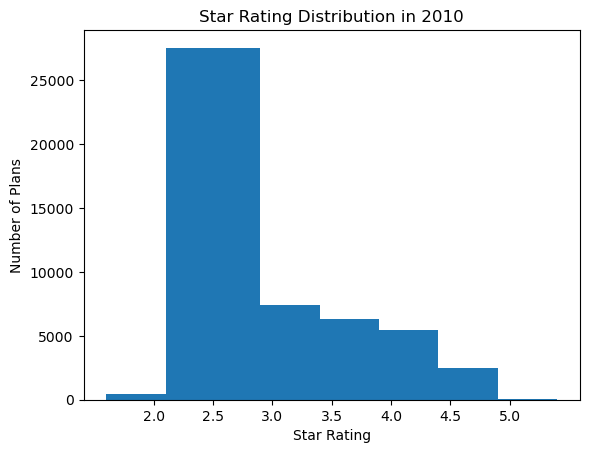

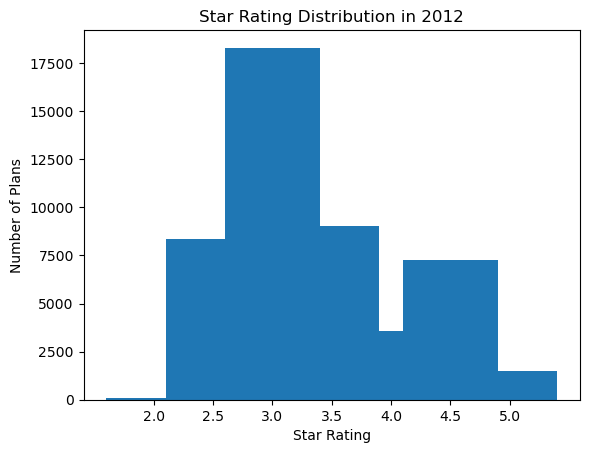

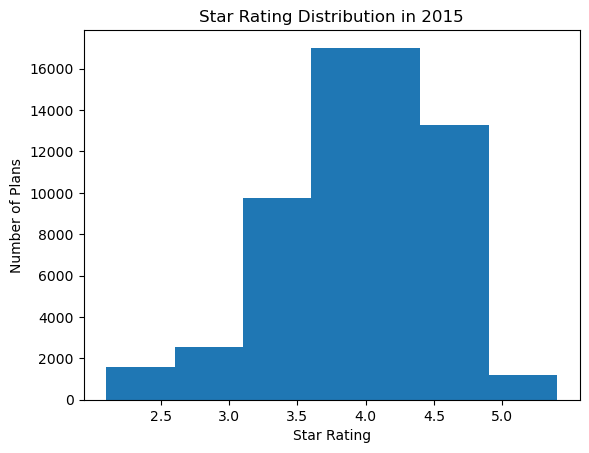

In [49]:
#QUESTION 2 
final_ma_data.columns = final_ma_data.columns.str.lower()
final_ma_data_2010 = final_ma_data[final_ma_data['year'] == 2010]
final_ma_data_2012 = final_ma_data[final_ma_data['year'] == 2012]
final_ma_data_2015 = final_ma_data[final_ma_data['year'] == 2015]

def plot_star_rating_distribution(data, year):
    star_counts = data['star_rating'].value_counts().sort_index()
    plt.bar(star_counts.index, star_counts.values)
    plt.title(f'Star Rating Distribution in {year}')
    plt.xlabel('Star Rating')
    plt.ylabel('Number of Plans')
    plt.xticks(star_counts.index)
    plt.show()

plot_star_rating_distribution(final_ma_data_2010, 2010)
plot_star_rating_distribution(final_ma_data_2012, 2012)
plot_star_rating_distribution(final_ma_data_2015, 2015)



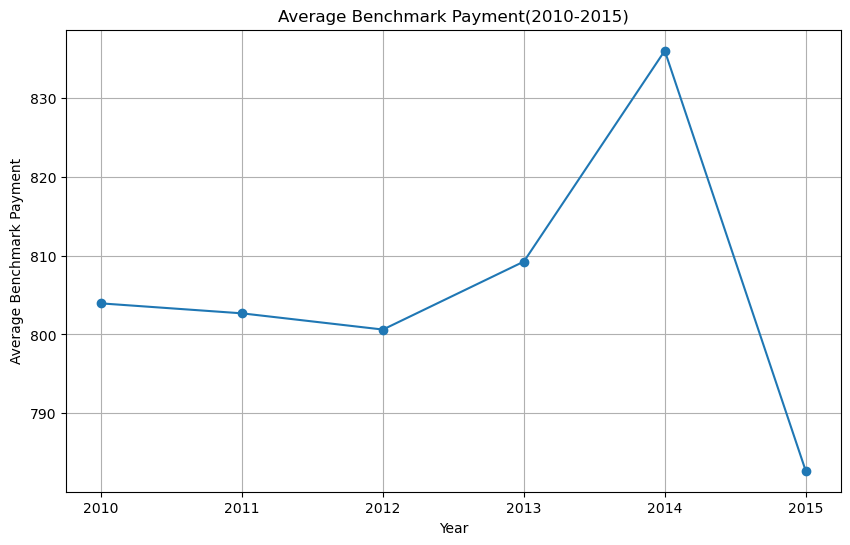

-21.236870591187085


In [47]:

#QUESTION 3 
avg_benchmark_pay = final_ma_data.groupby('year')['ma_rate'].mean().reset_index()

#ploting average benchmark payment 2010-2015
plt.figure(figsize=(10, 6))
plt.plot(avg_benchmark_pay['year'], avg_benchmark_pay['ma_rate'], marker='o')
plt.title('Average Benchmark Payment(2010-2015)')
plt.xlabel('Year')
plt.ylabel('Average Benchmark Payment')
plt.grid(True)
plt.show()

#Calculating the rise in average benchmark payment from 2010 to 2015
benchmark_2010 = avg_benchmark_pay[avg_benchmark_pay['year'] == 2010]['ma_rate'].values[0]
benchmark_2015 = avg_benchmark_pay[avg_benchmark_pay['year'] == 2015]['ma_rate'].values[0]
rise = benchmark_2015 - benchmark_2010

print(rise)



Index(['year', 'ma_share'], dtype='object')


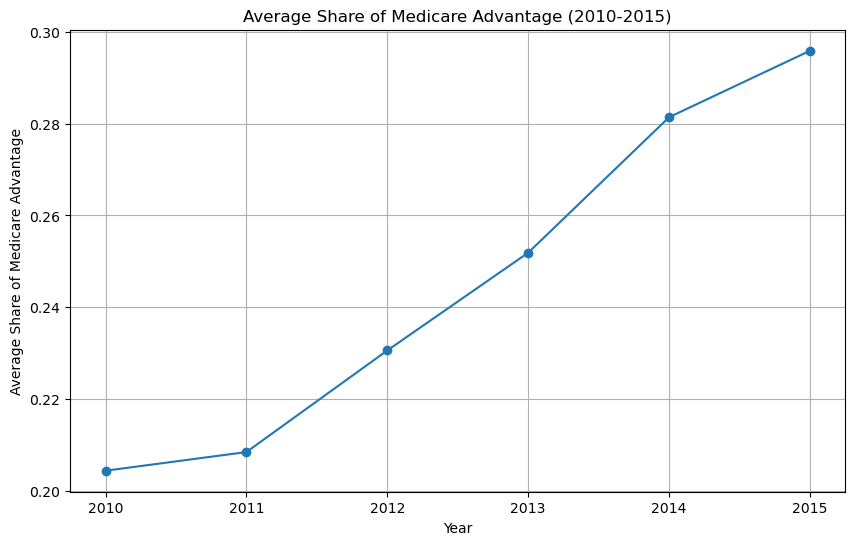

In [50]:
#QUESTION 4 

final_ma_data_copy = final_ma_data.copy()
final_ma_data_copy['ma_share'] = final_ma_data_copy['avg_enrolled'] / final_ma_data_copy['avg_eligibles']
final_ma_data_copy = final_ma_data_copy.groupby('year')['ma_share'].mean().reset_index()
print(final_ma_data_copy.columns)

plt.figure(figsize=(10, 6))
plt.plot(final_ma_data_copy['year'], final_ma_data_copy['ma_share'], marker='o')
plt.title('Average Share of Medicare Advantage (2010-2015)')
plt.xlabel('Year')
plt.ylabel('Average Share of Medicare Advantage')
plt.grid(True)
plt.show()



In [51]:
#Question 5
def round_rating(row):
    r = row['raw_rating']
    s = row['Star_Rating']
    if r >= 2.75 and r < 3.00 and s == 3.0:
        return 30
    elif r >= 3.25 and r < 3.50 and s == 3.5:
        return 35
    elif r >= 3.75 and r < 4.00 and s == 4.0:
        return 40
    elif r >= 4.25 and r < 4.50 and s == 4.5:
        return 45
    elif r >= 4.75 and r <= 5.00 and s == 5.0:
        return 50
    else:
        return None
    

    

In [52]:
#QUESTION 6 

In [54]:
#QUESTION 7

In [53]:
#QUESTION 8 